<a href="https://colab.research.google.com/github/wagner-alves-AI/PLN/blob/master/PLN_Semana01_Wagner_Alves_da_Silva.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### 1) Obtenha a base de dados do link abaixo e deixe-a disponível no Google Colab (via github, botão de upload ou google drive)
https://github.com/kunkaweb/nlp-class-resources/blob/master/hospital-data/patients.csv

In [ ]:
import os

!git clone https://github.com/kunkaweb/nlp-class-resources.git

Cloning into 'nlp-class-resources'...
remote: Enumerating objects: 11, done.
remote: Counting objects: 100% (11/11), done.
remote: Compressing objects: 100% (8/8), done.
remote: Total 11 (delta 0), reused 0 (delta 0), pack-reused 0
Unpacking objects: 100% (11/11), done.


### 2) Abra o arquivo CSV e carregue-o em um `DataFrame` do pandas

In [ ]:
import pandas as pd

uri = "https://raw.githubusercontent.com/kunkaweb/nlp-class-resources/master/hospital-data/patients.csv"
# Importa de arquivo CSV - CSVs não têm índices como os DataFrames, então devemos designar o index_col ao ler
csvDf = pd.read_csv('https://raw.githubusercontent.com/kunkaweb/nlp-class-resources/master/hospital-data/patients.csv', index_col=0)
display(csvDf)

###3) Qual o tamanho da base de dados? (Quantidade de linhas e colunas)

In [ ]:
csvDf.shape

(10368, 17)

###4) Mostre a quantidade de pacientes por gênero e depois plote um histograma

In [ ]:
import matplotlib.pyplot as plt
csvDf.groupby(by='gender').size()



gender
F    5330
M    5038
dtype: int64

Text(0, 0.5, 'pacients')

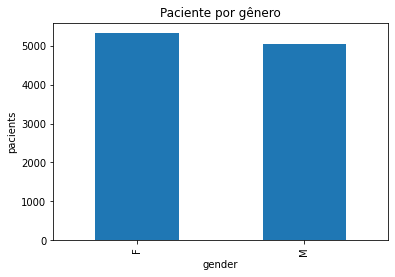

In [ ]:
csvDf.gender.value_counts().plot(kind='bar', title='Paciente por gênero')
plt.xlabel('gender')
plt.ylabel('pacients')

### 5) Crie uma nova coluna no `DataFrame` que diga se o paciente é "nativo" ou "estrageiro" - caso `ethnicity` seja igual a "american" ele é nativo.

In [ ]:
import numpy as np
csvDf['Procedencia'] = np.where(csvDf['ethnicity']== 'american', 'nativo', 'estrangeiro')
csvDf.head()

### 6) Mostre quantos pacientes de cada raça existem. Depois plote isso em um gráfico de barras.

In [ ]:
csvDf.groupby(by='race').size()

In [ ]:
csvDf.race.value_counts().plot(kind='bar', title='Paciente por raça')
plt.xlabel('raça')


### 7) Mostre a quantidade de valores nulos para cada coluna.

In [ ]:
csvDf.isnull().sum()

### 8) Qual a etnia (`ethnicity`) que mais teve diagnóstico de uso de opióides?
O paciente fez uso de opióide caso a coluna `prior_opioid_abuse_diag` tenha valor igual a 1.

In [ ]:
etnia =  csvDf['prior_opioid_abuse_diag'] == 1
csvDf.loc[etnia, 'ethnicity'].describe()


### 9) Mostre o índice de correlação entre as colunas

In [ ]:
csvDf.corr()

### 10) Remova as colunas: 'maiden','passport','drivers','prefix','suffix','ssn','first','last'

In [ ]:
csvDf2 = csvDf.drop(columns = ['maiden','passport','drivers','prefix','suffix','ssn','first','last'])
csvDf2.columns



Index(['birth_date', 'death_date', 'marital', 'race', 'ethnicity', 'gender',
       'birthplace', 'address', 'prior_opioid_abuse_diag', 'Procedencia'],
      dtype='object')

### 11) Altere o nome das colunas restantes para português

In [ ]:
csvDf2.columns = ['Data_nascimento', 'Data_morte','estado_civil' , 'raca', 'etnia', 'genero', 'local_nascimento', 'endereco', 'uso_opioides', 'origem']
csvDf2.columns

Index(['Data_nascimento', 'Data_morte', 'estado_civil', 'raca', 'etnia',
       'genero', 'local_nascimento', 'endereco', 'uso_opioides', 'origem'],
      dtype='object')

### 12) Exporte um arquivo CSV com as alterações feitas

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)
csvDf2.to_csv(r'/content/drive/My Drive/pacientes_v2.csv')


Mounted at /content/drive
